In [ ]:
!pip install pycaret

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('electrical_grid')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [ ]:
dataset.shape

(10000, 13)

In [ ]:
data = dataset.sample(frac=0.95, random_state=0)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 13)
Data For Predictions: (500, 13)


In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf = setup(data = data, target = 'stabf', session_id=123, fix_imbalance=True,
                normalize=True, normalize_method='minmax')

,Description,Value
0,session_id,123
1,Target,stabf
2,Target Type,Binary
3,Label Encoded,"stable: 0, unstable: 1"
4,Original Data,"(9500, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9322,0.9854,0.9385,0.9539,0.9461,0.8547,0.8551,0.347
et,Extra Trees Classifier,0.9212,0.9793,0.9426,0.9339,0.9381,0.8296,0.8300,0.893
rf,Random Forest Classifier,0.9098,0.9739,0.9127,0.9433,0.9276,0.8079,0.8090,1.567
gbc,Gradient Boosting Classifier,0.9098,0.9746,0.9079,0.9477,0.9273,0.8085,0.8100,2.214
ada,Ada Boost Classifier,0.8400,0.9267,0.8474,0.8950,0.8703,0.6618,0.6640,0.622
knn,K Neighbors Classifier,0.8395,0.9131,0.8379,0.9021,0.8687,0.6630,0.6663,0.316
dt,Decision Tree Classifier,0.8344,0.8280,0.8519,0.8828,0.8670,0.6479,0.6489,0.168
nb,Naive Bayes,0.8186,0.9105,0.8085,0.8953,0.8496,0.6227,0.6280,0.104
lr,Logistic Regression,0.8036,0.8908,0.8061,0.8744,0.8387,0.5885,0.5920,0.331
ridge,Ridge Classifier,0.8001,0.0000,0.7966,0.8770,0.8348,0.5833,0.5878,0.106


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9203,0.9837,0.9218,0.9511,0.9362,0.8301,0.8308
1,0.9188,0.9801,0.9360,0.9360,0.9360,0.8249,0.8249
2,0.9429,0.9883,0.9336,0.9752,0.9540,0.8787,0.8801
3,0.9444,0.9862,0.9621,0.9508,0.9564,0.8795,0.8796
4,0.9128,0.9792,0.9264,0.9353,0.9308,0.8129,0.8130
5,0.9353,0.9872,0.9287,0.9678,0.9479,0.8628,0.8641
6,0.9218,0.9853,0.9406,0.9362,0.9384,0.8314,0.8314
7,0.9398,0.9878,0.9430,0.9613,0.9520,0.8714,0.8717
8,0.9429,0.9911,0.9477,0.9614,0.9545,0.8776,0.8778
9,0.9428,0.9852,0.9454,0.9637,0.9544,0.8775,0.8778


In [ ]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9128,0.9795,0.9100,0.9505,0.9298,0.8148,0.8162
1,0.9188,0.9725,0.9313,0.9402,0.9357,0.8255,0.8256
2,0.9233,0.9861,0.9052,0.9720,0.9374,0.8387,0.8423
3,0.9278,0.9798,0.9336,0.9517,0.9426,0.8454,0.8457
4,0.9173,0.9768,0.9264,0.9420,0.9341,0.8230,0.8233
5,0.9308,0.9862,0.9287,0.9607,0.9444,0.8529,0.8537
6,0.9263,0.9793,0.9335,0.9493,0.9413,0.8423,0.8426
7,0.9338,0.9837,0.9430,0.9520,0.9475,0.8581,0.8581
8,0.9293,0.9843,0.9192,0.9675,0.9428,0.8506,0.8525
9,0.9202,0.9804,0.9216,0.9510,0.9361,0.8299,0.8306


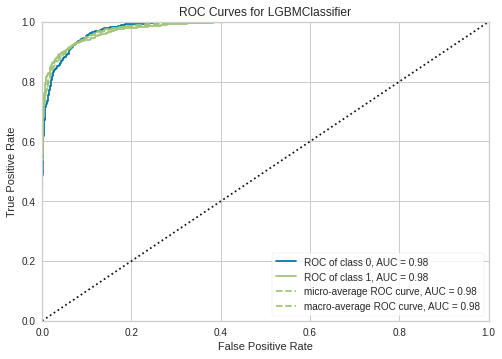

In [ ]:
plot_model(tuned_lgbm, plot = 'auc')

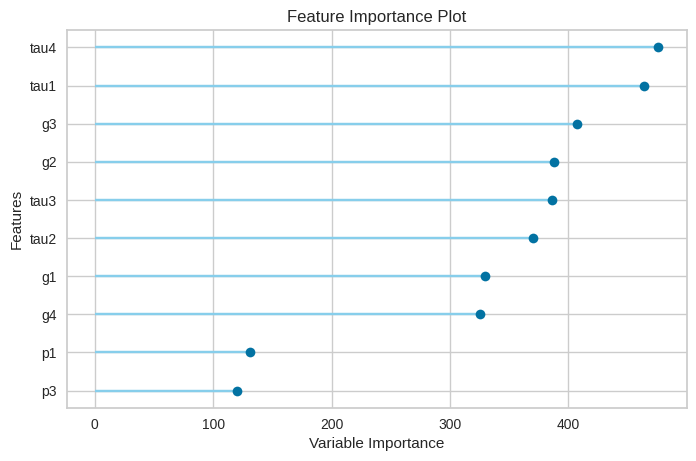

In [ ]:
plot_model(tuned_lgbm, plot='feature')

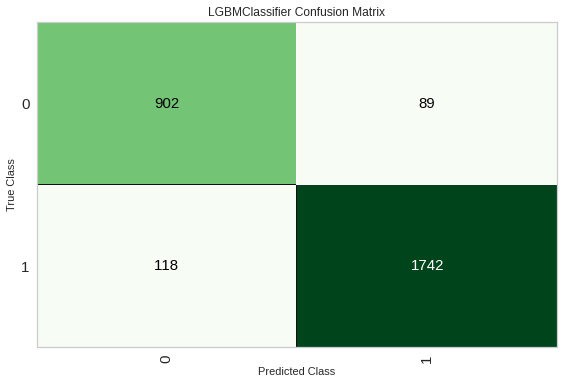

In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')